In [2]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ЗАДАЧА
## Имеется тело, вращающееся вокруг некоторой постоянной в пространстве оси.
## Известны его угол поворота и угловая скорость в некоторый начальный момент
## Требуется найти оптимальный по времени способ приведения тела в положение с нулевым углом поворота и нулевой скоростью вращения


 $$ I \dot{\mathbf{\omega}} = M, u = \frac{M}{I} $$

$$ \omega = \omega_0 + ut$$


$$ t = \frac{\omega - \omega_0}{u}$$

$$\phi = \phi_0 + \omega_0 \frac{\omega - \omega_0}{u} + \frac{u}{2}\cdot (\frac{\omega - \omega_0}{u})^2$$

$$\phi = \phi_{01} + \frac{\omega^2}{2u},
\phi_{01} = \phi_0 - \frac{\omega_0^2}{2u} $$

In [25]:
class trajectory:
    def __init__(self, angle, speed, u):
        self.angle0 = angle
        self.speed0 = speed
        self.u = u
        self.extr = 0
        
    def calculate_initial(self):
        if (self.speed0 >= 0):
            return self.angle0 + self.speed0**2/(2*self.u)
        else:
            return self.angle0 - self.speed0**2/(2*self.u)
    def calculate_first_part(self):
        phi01 = self.calculate_initial()
        if (self.speed0 >= 0):
            return lambda w: phi01 - w**2/(2*self.u)
        else:
            return lambda w: phi01 + w**2/(2*self.u)
    def calculate_second_part(self):
        if (self.speed0 >= 0):
            return lambda w: w**2/(2*self.u)
        else:
            return lambda w: - w**2/(2*self.u)
    def define_first_range(self):
        w_extr = (self.extr*self.u)**(0.5)
        return np.linspace(self.speed0, w_extr, 1000)
    def define_second_range(self):
        w_extr = (self.extr*self.u)**(0.5)
        return np.linspace(0, w_extr, 1000)
    def calculate_trajectory(self):
        self.extr = np.abs(self.calculate_initial())
        y1 = self.calculate_first_part()
        y2 = self.calculate_second_part()
        x1 = self.define_first_range()
        x2 = self.define_second_range()
        return (x1, y1, x2, y2)
    def visualize(self):
        fig1, ax1 = plt.subplots(1)
        (x1, y1, x2, y2) = self.calculate_trajectory()
        ax1.plot(y1(x1), x1, color='r') 
        ax1.plot(y2(x2), x2, color='g')
        ax1.grid(True)
        plt.show()

    def create_animation(self, xlim, ylim, filename):
        plt.style.use('dark_background')
        (x1, y1, x2, y2) = self.calculate_trajectory()

        fig = plt.figure()
        ax = plt.axes(xlim=xlim, ylim = ylim)
        line, = ax.plot([], [], lw=2)

        
        
        
        # Функция инициализации.
        def init():
            # создение пустого графа.
            line.set_data([], [])
            return line,
        
        
        xdata, ydata = [], []
        
        
        # функция анимации
        def animate(i):
            #t = 0.1 * i
        
            # x, y данные на графике
            
            if (i < 1000):
                x = x1[i]
                y = y1(x1[i])
            elif (1000 < i <2000):
                x = x2[1000 - i ]
                y = y2(x2[1000 -i])

            # print(x, y)
            # добавление новых точек в список точек осей x, y
            if (i!= 1000):
                xdata.append(x)
                ydata.append(y)
            line.set_data(ydata, xdata)
            return line,
        
        
        # Заголовок анимации
        plt.title('Trajectory')
        # Скрываем лишние данные
        plt.axis('on')
        
        # Вызов анимации.
        anim = animation.FuncAnimation(fig, animate, init_func=init,
                                    frames=2000, interval=20, blit=True)
        
        # Сохраняем анимацию как gif файл
        anim.save(filename, writer='pillow')
        
 
    

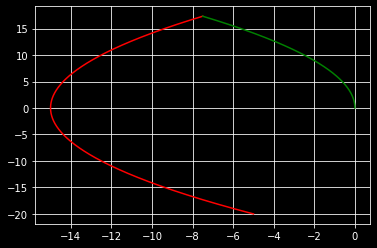

In [17]:
trajectory(-5, -20, 20).visualize()

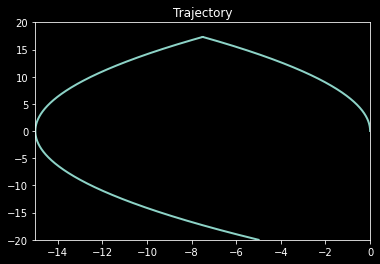

In [26]:
trajectory(-5, -20, 20).create_animation([-15, 0], [-20, 20], 'tr4.gif')